<a href="https://colab.research.google.com/github/mahnoor173/Data-Science-BWF-Mahnoor/blob/main/Task16/Task16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN**

In [ ]:
import numpy as np
from collections import Counter

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# KNN classifier function
def knn_classify(X_train, y_train, X_test, k):
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], X_test)
        distances.append((distance, y_train[i]))

    # Sort distances and get the labels of the k nearest neighbors
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = [distances[i][1] for i in range(k)]

    # Get the most common class label
    majority_vote = Counter(nearest_neighbors).most_common(1)
    return majority_vote[0][0]

# Training data: weight (g), color intensity
X_train = np.array([[150, 6], [120, 4], [200, 7]])
y_train = ['Apple', 'Banana', 'Orange']

# New data point
X_test = np.array([100, 7])

# Predict the class of the new data point with k=3
prediction = knn_classify(X_train, y_train, X_test, k=3)
print(f"The predicted fruit is: {prediction}")


**K-Means Clustering Algorithm**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


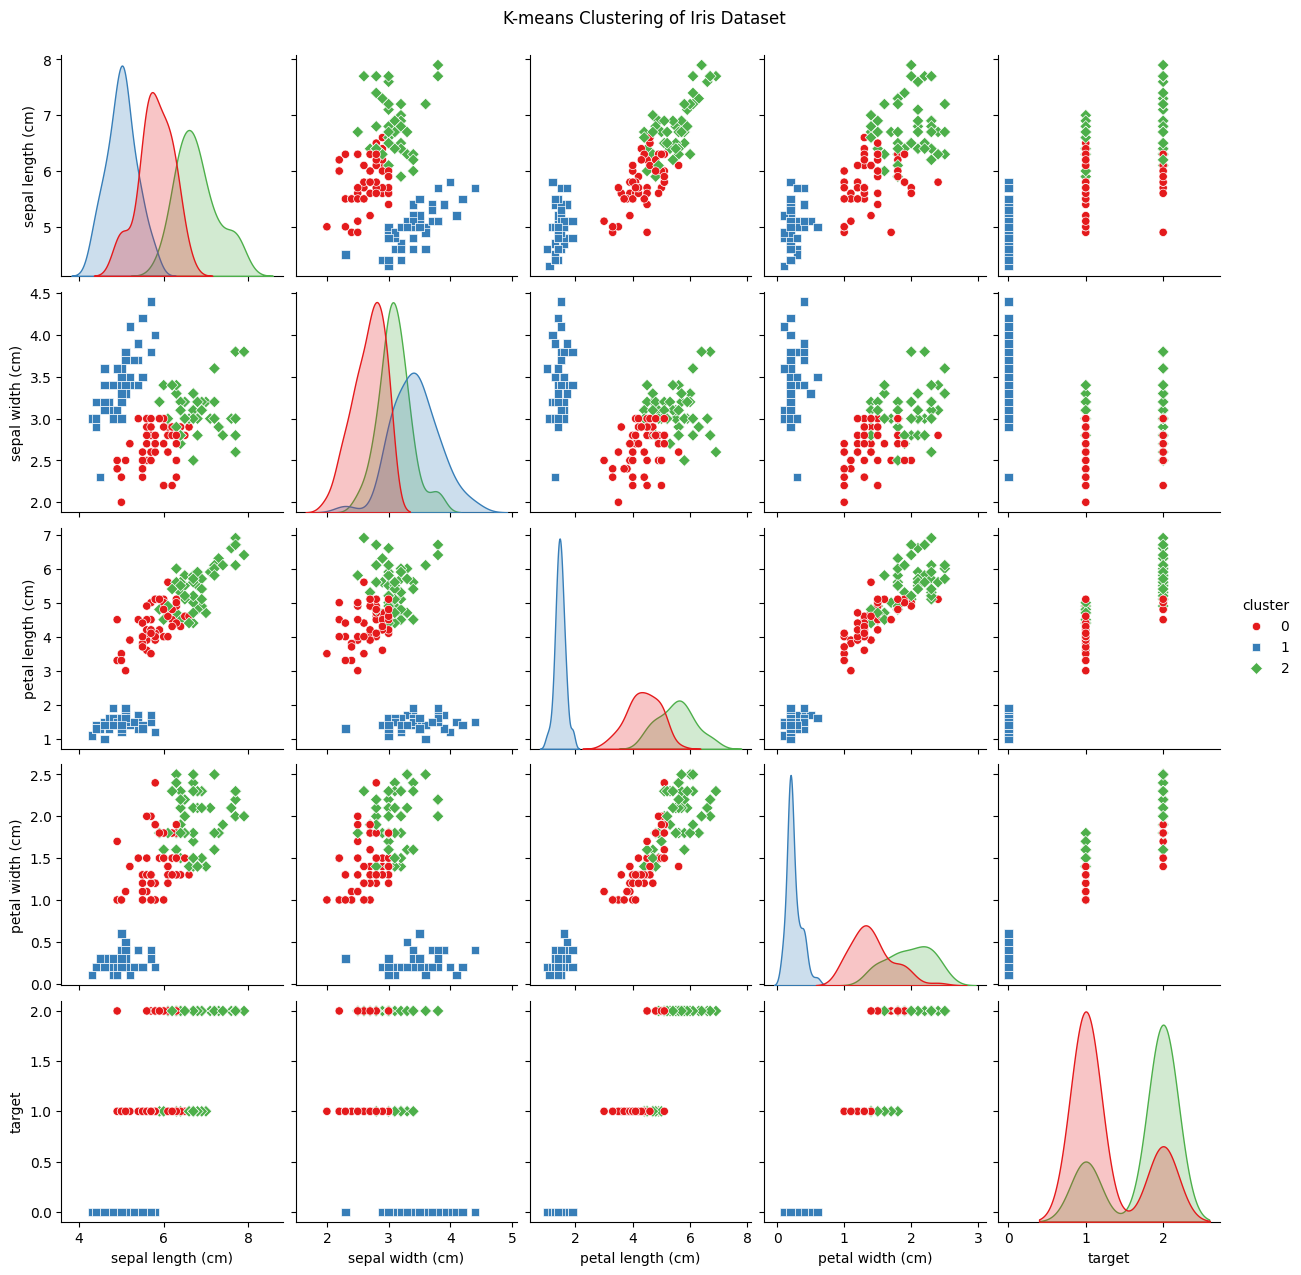

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
data = iris.data
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = iris.target

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.labels_

# Create a pair plot with cluster labels
sns.pairplot(df, hue='cluster', palette='Set1', markers=['o', 's', 'D'], diag_kind='kde')
plt.suptitle("K-means Clustering of Iris Dataset", y=1.02)
plt.show()


**Support Vector Machine Algorithm**
1. Load the dataset
2. Split the dataset into training and testing sets
3. Standardize the data
4. Train the SVM model
5. Make predictions and evaluate the model
6. Visualize the decision boundaries

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Accuracy: 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0

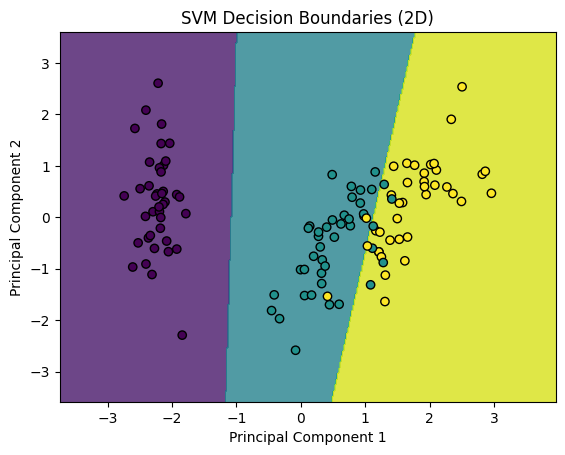

In [5]:
# Import necessary libraries
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Create a DataFrame for better visualization
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = target

# Display the first few rows of the DataFrame
print(df.head())

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Step 3: Standardize the data
# Standardizing the data so that each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train the SVM model
# Using a linear kernel for the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
# Making predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Printing the evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Step 6: Visualize the decision boundaries (optional for 2D data)
# Reduce the data to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Retrain the SVM model on 2D data
svm_model_2d = SVC(kernel='linear', random_state=42)
svm_model_2d.fit(X_train_2d, y_train)

# Create a mesh to plot the decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundaries
Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o')
plt.title('SVM Decision Boundaries (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
